In [6]:
import pickle as pkl
import plotly.express as pex
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
WEBPATH = '/Users/cosinga/code/calvinosinga.github.io/papers/higal_cross/images/'

In [2]:
data = pkl.load(open("/Users/cosinga/code/hcolor/fig_md_analysis/hi_gal/populations/snap99.pkl", 'rb'))

In [3]:
  
def line_eq(snap, l):
    x = np.zeros(l*3)
    y = np.zeros(l*3)
    x0 = 0; y0 = 1.3
    if snap == 33:
        b = 0.8
        x2 = 1.5
    else:
        b = 0.85
        x2= 1.6
    x1 = (y0 - b)/0.88
    x2
    x[:l] = np.linspace(x0, x1, l)
    y[:l] = y0
    x[l:l*2] = np.linspace(x1, x2, l)
    y[l:l*2] = 0.88*x[l:l*2] + b
    x[l*2:] = x2
    y[l*2:] = np.linspace(0.88 * x2 + b, 2.5, l)
    return x, y

def is_sf(vj, uv, snap):
    
    if snap >= 50: # z <= 1
        b = 0.85
    else:
        b = 0.8
    mask2 = uv > 0.88 * vj + b
    if snap >= 40: # z <= 1.5
        vjlim = 1.6
        uvlim = 1.3
    elif snap >= 33:
        vjlim = 1.5
        uvlim = 1.3
    else:
        vjlim = 1.4
        uvlim = 1.2
        
    mask3 = vj < vjlim
    mask1 = uv > uvlim

    sf_mask = mask1 & mask2 & mask3
    return sf_mask

def dist(vj, uv, snap, l):
    x, y = line_eq(snap, l)
    sf_mask = is_sf(vj, uv, snap)
    dist = np.zeros_like(vj)
    for gal in range(len(vj)):
        galvj = vj[gal]
        galuv = uv[gal]
        dist[gal] = np.min(np.sqrt((x - galvj)**2 + (y - galuv)**2))
    
    dist[sf_mask] *= -1
    return dist

In [4]:
snap = 99
stmass = data['stmass']
mmask = stmass > 2e8
nan_mask = np.isnan(data['uv'])
vj = data['vj'][~nan_mask & mmask]
uv = data['uv'][~nan_mask & mmask]
gr = data['gr'][~nan_mask & mmask]

(array([   2.,    2.,    7.,    7.,   22.,   30.,   29.,   32.,   40.,
          54.,   67.,  102.,  134.,  185.,  272.,  408.,  490.,  718.,
         883., 1080., 1281., 1413., 1527., 1543., 1570., 1559., 1443.,
        1315., 1177.,  960.,  824.,  765.,  656.,  525.,  491.,  451.,
         423.,  457.,  502.,  743., 1090., 1281., 1202., 1256., 1377.,
         899.,  548.,  239.,   81.,   13.]),
 array([-0.17921448, -0.15787704, -0.13653961, -0.11520218, -0.09386475,
        -0.07252731, -0.05118988, -0.02985245, -0.00851501,  0.01282242,
         0.03415985,  0.05549728,  0.07683472,  0.09817215,  0.11950959,
         0.14084701,  0.16218445,  0.18352188,  0.20485932,  0.22619675,
         0.24753419,  0.2688716 ,  0.29020905,  0.31154647,  0.33288392,
         0.35422134,  0.37555876,  0.3968962 ,  0.41823363,  0.43957108,
         0.4609085 ,  0.48224595,  0.5035834 ,  0.5249208 ,  0.5462582 ,
         0.56759566,  0.5889331 ,  0.61027056,  0.63160795,  0.6529454 ,
         0.67428

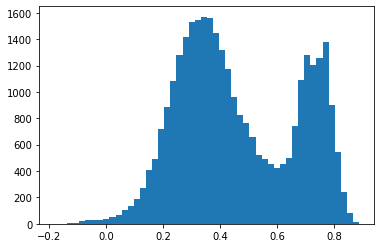

In [5]:
plt.hist(gr, bins = 50)

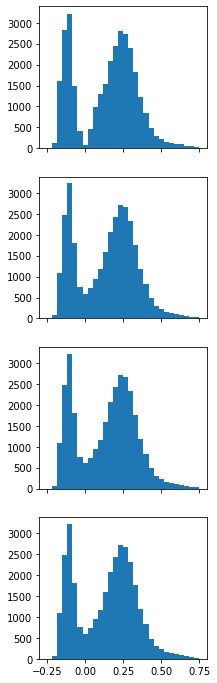

In [6]:
tests = [10, 100, 1000, 10000]
fig, axes = plt.subplots(len(tests), 1, figsize=(3, 3*len(tests)), sharex = True, sharey = True)
norm = mpl.colors.LogNorm(1, 1e4)
for i in range(len(tests)):
    plt.sca(axes[i])
    uvjdist = dist(vj, uv, snap, tests[i])
    
    plt.hist(uvjdist, bins = 30, range = [-0.25, 0.75])
    

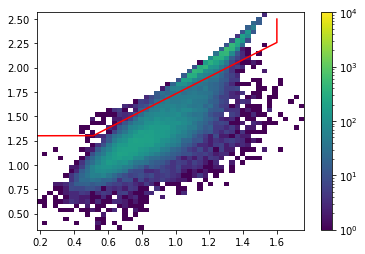

In [7]:
x, y = line_eq(snap, 10000)
plt.hist2d(vj, uv, norm = norm, bins = 50)
plt.colorbar()
plt.plot(x, y, color = 'red')

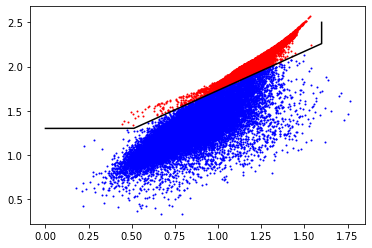

In [8]:
nonsf = is_sf(vj, uv, snap)
plt.scatter(vj[nonsf], uv[nonsf], color = 'red', s = 1)

plt.scatter(vj[~nonsf], uv[~nonsf], color = 'blue', s = 1)

plt.plot(x, y, color = 'black')

(0.0, 1.0, 0.0, 1.0)

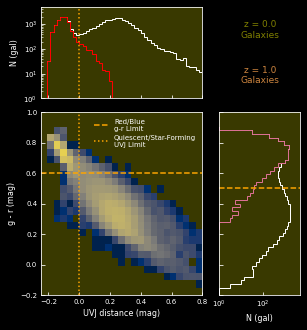

In [50]:
snap = 99
data = pkl.load(open("/Users/cosinga/code/hcolor/fig_md_analysis/hi_gal/populations/snap99.pkl", 'rb'))
stmass = data['stmass']
mmask = stmass > 2e8
nan_mask = np.isnan(data['uv'])
vj = data['vj'][~nan_mask & mmask]
uv = data['uv'][~nan_mask & mmask]
gr = data['gr'][~nan_mask & mmask]
uvjdist = dist(vj, uv, snap, 1000)
nlims = [1, 5e3]
s99col = mpl.colors.to_rgba('olive', 0.45)
s50col = mpl.colors.to_rgba('peru', 0.45)


fig = plt.figure(figsize = (11, 8))
regsize = 3
ratio = 0.5
gsp = mpl.gridspec.GridSpec(2, 5, bottom = .5, top = 1, left = .1, right = .9,
                            width_ratios = [regsize, regsize*ratio, regsize, regsize*ratio, regsize*ratio], 
                            height_ratios = [regsize*ratio, regsize], figure = fig, wspace = 0.15, hspace = 0.1)

limcol = 'orange'
redcol = 'red'
qcol = 'palevioletred'
alluvjcol = 'white'
allgrcol = 'white'
grrange = [-0.2, 1.0]
uvjrange = [-0.25, 0.8]
bn = 25
norm = mpl.colors.LogNorm(nlims[0], nlims[1])
cmap = mpl.cm.get_cmap('cividis')
fig.set(facecolor = 'black')

ax = fig.add_subplot(gsp[1, 0])
plt.sca(ax)
plt.hist2d(uvjdist, gr,  bins = bn, range = [uvjrange, grrange], norm = norm, cmap = cmap)
plt.xlim(uvjrange)
plt.ylim(grrange)
plt.plot(plt.xlim(), [0.6, 0.6], color = limcol, linestyle = '--', label = 'Red/Blue\ng-r Limit')
plt.plot([0, 0], plt.ylim(), color = limcol, linestyle = ':', label = 'Quiescent/Star-Forming\nUVJ Limit')
plt.legend(frameon = False, loc = 'upper right', labelcolor = 'white', fontsize = 7)
ax.tick_params(which = 'both', direction = 'in', labelsize = 7, labelcolor = 'white', color = 'white')
plt.ylabel('g - r (mag)', fontsize = 8, color = 'white')
plt.xlabel('UVJ distance (mag)', fontsize = 8, color = 'white')
ax.set_facecolor(s99col)
for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax = fig.add_subplot(gsp[0, 0])
plt.sca(ax)
isred = gr > 0.6
uvjhist = plt.hist(uvjdist, bins = bn*2, range = uvjrange, histtype = 'step', color = alluvjcol,
                  label = 'All Galaxies')
redhist = plt.hist(uvjdist[isred], color = redcol, bins = bn*2, range = uvjrange, histtype = 'step', 
        label = 'Red Galaxies')
plt.yscale('log')
plt.xlim(uvjrange)
plt.ylim(nlims)
ax.tick_params(which = 'both', direction = 'in', labelbottom = False, labelsize = 7, labelcolor = 'white', color = 'white')
plt.plot([0, 0], plt.ylim(), color = limcol, linestyle = ':')
plt.ylabel('N (gal)', color = 'white', fontsize = 8)
ax.set_facecolor(s99col)
for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax = fig.add_subplot(gsp[1, 1])
for spine in ax.spines.values():
    spine.set_edgecolor('white')
plt.sca(ax)
ax.tick_params(which = 'both', direction = 'in', labelleft = False, labelsize = 7, labelcolor = 'white', color = 'white')
isq = is_sf(vj, uv, snap)
plt.hist(gr, range = grrange, color = allgrcol, bins = bn*2, 
         orientation = 'horizontal', histtype = 'step', label = 'All Galaxies')
qhist = plt.hist(gr[isq], range = grrange, bins = bn*2, orientation = 'horizontal', histtype = 'step', color = qcol,
        label = 'Quiescent Galaxies')
plt.ylim(grrange)
plt.xlim(nlims)
plt.plot(plt.xlim(), [0.5, 0.5], color = limcol, linestyle = '--')
plt.xscale('log')
# plt.legend(loc = [0, 1.15], frameon = False, handles = [uvjhist[2][0], qhist[2][0], redhist[2][0]])
plt.xlabel('N (gal)', fontsize = 8, color = 'white')
ax.set_facecolor(s99col)

ax = fig.add_subplot(gsp[0, 1])
plt.sca(ax)
plt.text(0.5, 0.75, 'z = 0.0\nGalaxies', fontsize = 9, color = 'olive', ha = 'center', va = 'center', transform = ax.transAxes)
plt.text(0.5, 0.25, 'z = 1.0\nGalaxies', fontsize = 9, color = 'peru', ha = 'center', va = 'center', transform = ax.transAxes)
plt.axis('off')

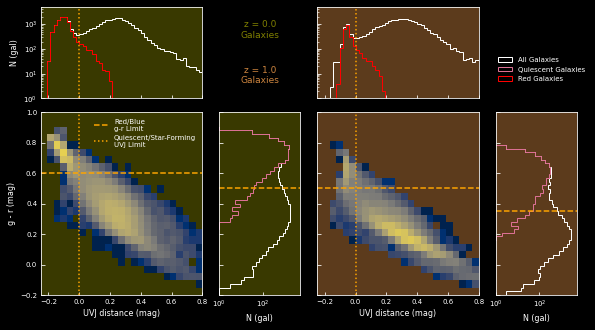

In [51]:
snap = 50
data = pkl.load(open("/Users/cosinga/code/hcolor/fig_md_analysis/hi_gal/populations/snap50.pkl", 'rb'))
stmass = data['stmass']
mmask = stmass > 2e8
nan_mask = np.isnan(data['uv'])
vj = data['vj'][~nan_mask & mmask]
uv = data['uv'][~nan_mask & mmask]
gr = data['gr'][~nan_mask & mmask]
uvjdist = dist(vj, uv, snap, 1000)

ax = fig.add_subplot(gsp[1, 2])
plt.sca(ax)
plt.hist2d(uvjdist, gr,  bins = bn, range = [uvjrange, grrange], norm = norm, cmap = cmap)
plt.xlim(uvjrange)
plt.ylim(grrange)
plt.plot(plt.xlim(), [0.5, 0.5], color = limcol, linestyle = '--', label = 'Red/Blue\ng-r Limit')
plt.plot([0, 0], plt.ylim(), color = limcol, linestyle = ':', label = 'Quiescent/Star-Forming\nUVJ Limit')
# plt.legend(frameon = False, loc = 'upper right')
ax.tick_params(which = 'both', direction = 'in', labelsize = 7, labelleft = False, labelcolor = 'white', color = 'white')
plt.xlabel('UVJ distance (mag)', fontsize = 8, color = 'white')
ax.set(facecolor = s50col)
for spine in ax.spines.values():
    spine.set_edgecolor('white')
ax = fig.add_subplot(gsp[0, 2])
plt.sca(ax)
isred = gr > 0.5
uvjhist = plt.hist(uvjdist, bins = bn*2, range = uvjrange, histtype = 'step', color = alluvjcol,
                  label = 'All Galaxies')
redhist = plt.hist(uvjdist[isred], color = redcol, bins = bn*2, range = uvjrange, histtype = 'step', 
        label = 'Red Galaxies')
plt.yscale('log')
plt.xlim(uvjrange)
plt.ylim(nlims)
ax.tick_params(which = 'both', direction = 'in', labelbottom = False, labelleft = False, labelcolor = 'white', color = 'white', labelsize = 7)
plt.plot([0, 0], plt.ylim(), color = limcol, linestyle = ':')
ax.set_facecolor(s50col)
for spine in ax.spines.values():
    spine.set_edgecolor('white')
ax = fig.add_subplot(gsp[1, 3])
plt.sca(ax)
ax.tick_params(which = 'both', direction = 'in', labelleft = False, labelsize = 7, labelcolor = 'white', color = 'white')
isq = is_sf(vj, uv, snap)
plt.hist(gr, range = grrange, color = allgrcol, bins = bn*2, 
         orientation = 'horizontal', histtype = 'step', label = 'All Galaxies')
qhist = plt.hist(gr[isq], range = grrange, bins = bn*2, orientation = 'horizontal', histtype = 'step', color = qcol,
        label = 'Quiescent Galaxies')
plt.ylim(grrange)
plt.xlim(nlims)
plt.plot(plt.xlim(), [0.35, 0.35], color = limcol, linestyle = '--')
plt.xscale('log')
plt.legend(loc = [0, 1.15], frameon = False, handles = [uvjhist[2][0], qhist[2][0], redhist[2][0]], fontsize = 7, labelcolor = 'white')
plt.xlabel('N (gal)', fontsize = 8, color = 'white')
ax.set_facecolor(s50col)
for spine in ax.spines.values():
    spine.set_edgecolor('white')

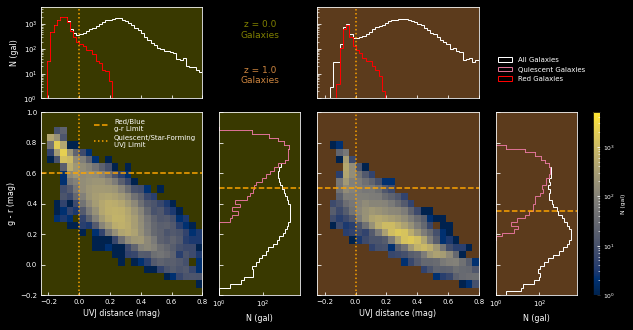

In [52]:
ax = fig.add_subplot(gsp[1, 4])
plt.sca(ax)
plt.colorbar(cax = ax, cmap = cmap, norm = norm, anchor = (-0.5, 0))
ax.tick_params(which = 'both', direction = 'in', labelsize = 6, color = 'white', labelcolor = 'white')
plt.ylabel('N (gal)', fontsize = 6, labelpad = 6, color = 'white')
ax.set_aspect(8)
ax.set_anchor('W')

In [53]:
# fig.savefig('/Users/cosinga/code/hicolor_draft/figures/gr-uvj_hist.pdf', dpi = 150)
fig.savefig(WEBPATH + 'gr-uvj_hist.png', dpi = 150, facecolor = 'auto', bbox_inches = 'tight')

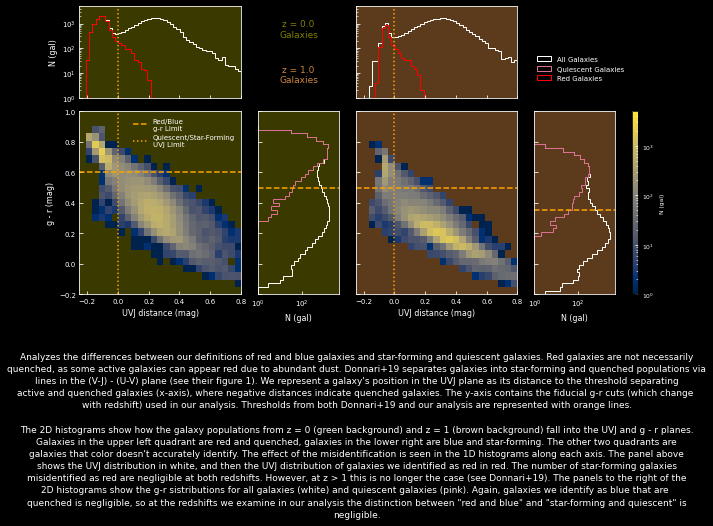

In [54]:
f = open(WEBPATH + 'gr-uvj_caption.txt', 'r')
text = f.read()
fig.text(0.45, 0.4, text, color = 'white', ha = 'center', va = 'top', fontsize = 9, linespacing = 1.45)
fig

In [55]:
fig.savefig(WEBPATH + 'gr-uvj_hist_caption.png', dpi = 150, facecolor = 'auto', bbox_inches = 'tight')